In [1]:
import glob

import csv
import statistics
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

plt.style.use(['science', 'ieee', 'no-latex'])  #pip install SciencePlots==1.0.9

In [2]:
def imprt():
    M = {}
    P = {}
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/missions.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            M[row[0]] = np.genfromtxt(row[1:10], dtype='int')
    
    with open('C:/Users/Coen/Documents/GitHub/CT_schedule/data/pilots.csv', mode='r',encoding='utf-8-sig') as f:
        reader = csv.reader(f)
        for row in reader:
            P[row[0]] = np.genfromtxt(row[1:6], dtype='int')
    return M, P

In [3]:
def read_history_live(hist):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 41
        else:
            check_min = total_sorties_p >= 58
        count = 0
        for m in M:     
            if hist[p][m] - M[m][P[p][0]] < 0:
                count += 1
                print(f'min LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 69
        else:
            check_desired = total_sorties_p >= 73
        count = 0
        for m in M:
            if hist[p][m] - M[m][P[p][1]] < 0:
                count += 1
                print(f'desired LIVE failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [4]:
def read_history_sim(hist_sim):
    no_sorties = list()
    min_CT = 0 
    for p in P: 
        total_sorties_p = sum(hist_sim[p].values())
        no_sorties.append(total_sorties_p)
        if P[p][4] > 0:
            check_min = total_sorties_p >= 37
        else:
            check_min = total_sorties_p >= 42
        count = 0
        for m in M:     
            if hist_sim[p][m] - M[m][P[p][2]] < 0:
                count += 1
                print(f'min SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_min:
            min_CT += 1
    des_CT = 0 
    sorties = sum([sum(hist_sim[k].values()) for k in hist.keys()])
    for p in P:
        total_sorties_p = sum(hist[p].values())
        if P[p][4] > 0:
            check_desired = total_sorties_p >= 53
        else:
            check_desired = total_sorties_p >= 72
        count = 0
        for m in M:
            if hist_sim[p][m] - M[m][P[p][P[p][3]]] < 0:
                count += 1
                print(f'desired SIM failed for pilot {p} on mission {m}')
        if count <= 0 and check_desired:
            des_CT += 1
    
    return min_CT, des_CT, sorties, no_sorties

In [5]:
M, P = imprt()

In [6]:
data = np.full((len(glob.glob('*CTresults_live.txt')),6), 0)
i = 0
print('live missions:')
for file in glob.glob('*CTresults_live.txt'):
    with open(file) as f:
        hist = json.load(f)
        min_CT, des_CT, sorties, no_sorties_live = read_history_live(hist)
        data[i][0] = min_CT
        data[i][1] = des_CT
        data[i][2] = sorties
        i += 1
i = 0
print('sim missions:')
for simfile in glob.glob('*CTresults_sim.txt'):
    with open(simfile) as g:
        hist_sim = json.load(g)
        min_CT, des_CT, sorties, no_sorties_sim = read_history_sim(hist_sim)
        data[i][3] = min_CT
        data[i][4] = des_CT
        data[i][5] = sorties
        i += 1

live missions:
min LIVE failed for pilot Viper on mission DCA_n_4
min LIVE failed for pilot Merlin on mission OCA_n_4
min LIVE failed for pilot Merlin on mission SDEAD_n_4
min LIVE failed for pilot Merlin on mission DCA_n_4
desired LIVE failed for pilot Viper on mission DCA_n_4
desired LIVE failed for pilot Viper on mission CAS_n_2
desired LIVE failed for pilot Hollywood on mission CAS_d_4
desired LIVE failed for pilot Merlin on mission OCA_n_4
desired LIVE failed for pilot Merlin on mission SDEAD_n_4
desired LIVE failed for pilot Merlin on mission DCA_n_4
desired LIVE failed for pilot Zone on mission AI_d_4
min LIVE failed for pilot Goose on mission SDEAD_n_4
min LIVE failed for pilot Sundown on mission DCA_n_4
min LIVE failed for pilot Stinger on mission OCA_d_4
min LIVE failed for pilot Hollywood on mission CAS_n_4
min LIVE failed for pilot Charlie on mission OCA_n_4
desired LIVE failed for pilot Goose on mission SDEAD_n_4
desired LIVE failed for pilot Sundown on mission OCA_n_2
des

In [7]:
pilotFL = list()
for p in P:
    pilotFL.append(P[p][4])
print(no_sorties_live)
print(sum(no_sorties_live))
print(no_sorties_sim)
print(sum(no_sorties_sim))
print(pilotFL)
#for i in range(len(no_sorties_live)):
 #   print(no_sorties_live[i]+(no_sorties_sim[i]))

[83, 90, 83, 87, 91, 84, 83, 88, 87, 84, 89, 86, 86, 85, 87, 84, 84, 82]
1543
[70, 70, 70, 77, 87, 87, 90, 90, 68, 70, 72, 68, 90, 93, 84, 86, 68, 68]
1408
[4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4]


In [8]:
comp = []
for i in range(len(data)):
    print(data[i])
    print(min(data[i]))
    comp.append(min(data[i]))

[  16   14 1572   18   17 1400]
14
[  13   10 1555   18   17 1389]
10
[  17   16 1547   18   17 1379]
16
[  17   17 1558   18   17 1416]
17
[  18   16 1568   18   18 1402]
16
[  16   16 1614   18   16 1413]
16
[  17   16 1596   18   17 1410]
16
[  18   18 1577   18   18 1417]
18
[  17   17 1574   18   15 1379]
15
[  18   17 1553   18   15 1368]
15
[  17   16 1526   18   16 1430]
16
[  17   17 1563   18   17 1407]
17
[  17   16 1585   18   15 1388]
15
[  17   17 1589   18   15 1384]
15
[  13   13 1486   16   11 1314]
11
[  18   17 1544   18   15 1394]
15
[  18   14 1509   18   17 1398]
14
[  17   17 1535   18   15 1386]
15
[  16   16 1566   18   15 1391]
15
[  16   16 1597   18   14 1387]
14
[  17   17 1585   18   17 1407]
17
[  15   15 1558   18   17 1426]
15
[  18   16 1546   18   18 1408]
16
[  17   17 1591   18   17 1411]
17
[  15   14 1466   18   12 1336]
12
[  15   15 1559   18   15 1380]
15
[  14   14 1549   18   15 1386]
14
[  17   16 1581   18   15 1410]
15
[  13   13 1550   18

In [9]:
print(sum(comp)/len(comp))

14.966666666666667


14
10
16
17
16
16
16
18
15
15
16
17
15
15
11
15
14
15
15
14
17
15
16
17
12
15
14
15
13
15


{'whiskers': [<matplotlib.lines.Line2D at 0x1cab0697d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1cab06ad460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cab0697a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1cab06adb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cab06ade20>],
 'means': []}

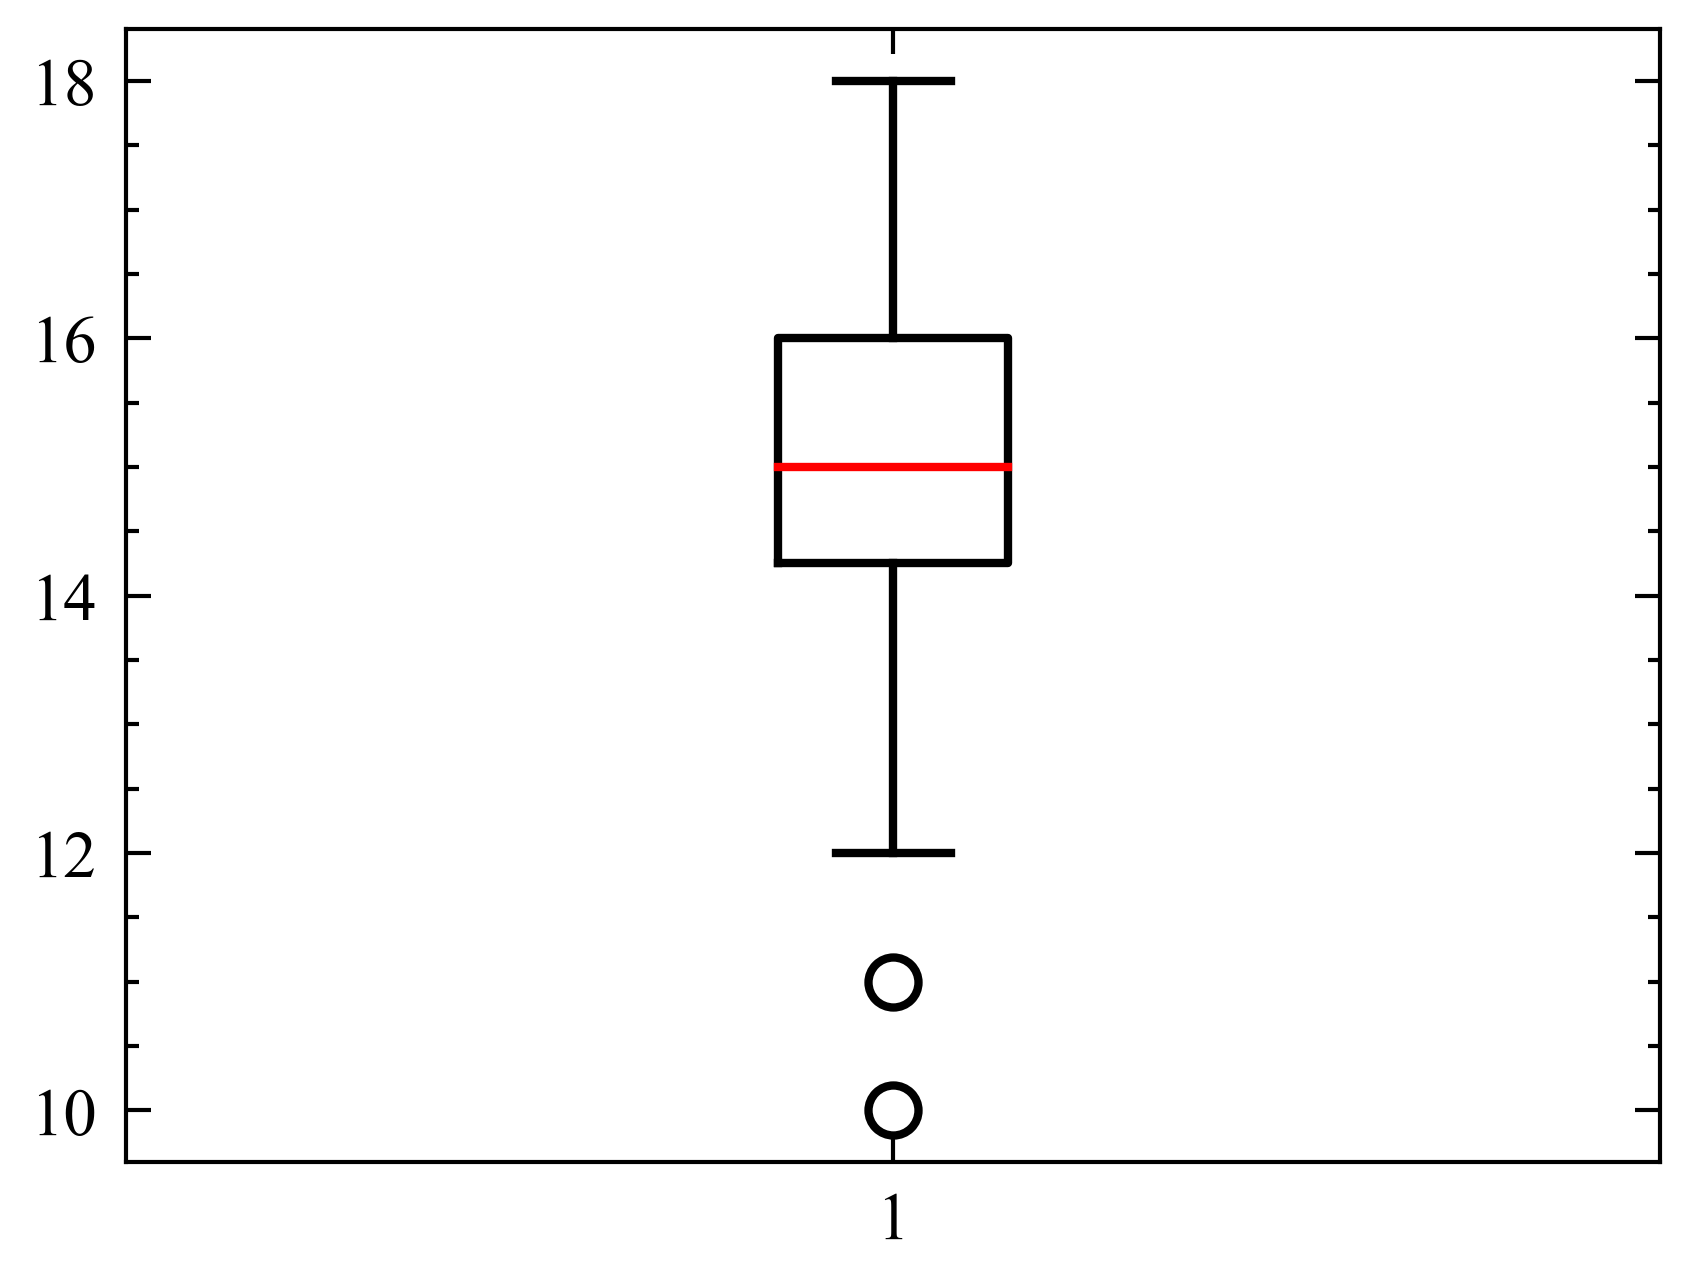

In [10]:
avgs = []
for i in range(len(data)):
    print(min(data[i]))
    avgs.append(min(data[i]))
plt.boxplot(avgs)

In [11]:
print(sum(avgs)/len(avgs))

14.966666666666667


In [12]:
run_data = []
relative = []
for file in glob.glob('*_data.txt'):
    with open(file) as f:
        a = json.load(f)
        run_data.append(a["FHR_cummulative"])
        relative.append(a['regen'])
print(run_data[0][1])


7.5


In [13]:
print(run_data)

[[7.5, 7.5, 7.5, 7.5, 16.5, 25.5, 30.0, 39.0, 39.0, 39.0, 49.5, 60.0, 69.0, 75.0, 85.5, 85.5, 85.5, 91.5, 106.5, 114.0, 114.0, 117.0, 117.0, 117.0, 130.5, 139.5, 151.5, 159.0, 166.5, 166.5, 166.5, 177.0, 187.5, 196.5, 202.5, 210.0, 210.0, 210.0, 217.5, 228.0, 231.0, 237.0, 241.5, 241.5, 241.5, 250.5, 252.0, 258.0, 262.5, 268.5, 268.5, 268.5, 274.5, 283.5, 292.5, 307.5, 315.0, 315.0, 315.0, 322.5, 325.5, 333.0, 339.0, 345.0, 345.0, 345.0, 355.5, 369.0, 376.5, 390.0, 403.5, 403.5, 403.5, 417.0, 430.5, 441.0, 448.5, 460.5, 460.5, 460.5, 472.5, 478.5, 487.5, 492.0, 499.5, 499.5, 499.5, 513.0, 517.5, 525.0, 535.5, 547.5, 547.5, 547.5, 547.5, 556.5, 561.0, 568.5, 580.5, 580.5, 580.5, 589.5, 601.5, 616.5, 628.5, 636.0, 636.0, 636.0, 642.0, 654.0, 667.5, 675.0, 685.5, 685.5, 685.5, 691.5, 705.0, 720.0, 730.5, 745.5, 745.5, 745.5, 757.5, 771.0, 777.0, 789.0, 802.5, 802.5, 802.5, 814.5, 822.0, 835.5, 849.0, 864.0, 864.0, 864.0, 871.5, 879.0, 892.5, 900.0, 906.0, 906.0, 906.0, 916.5, 930.0, 943.5

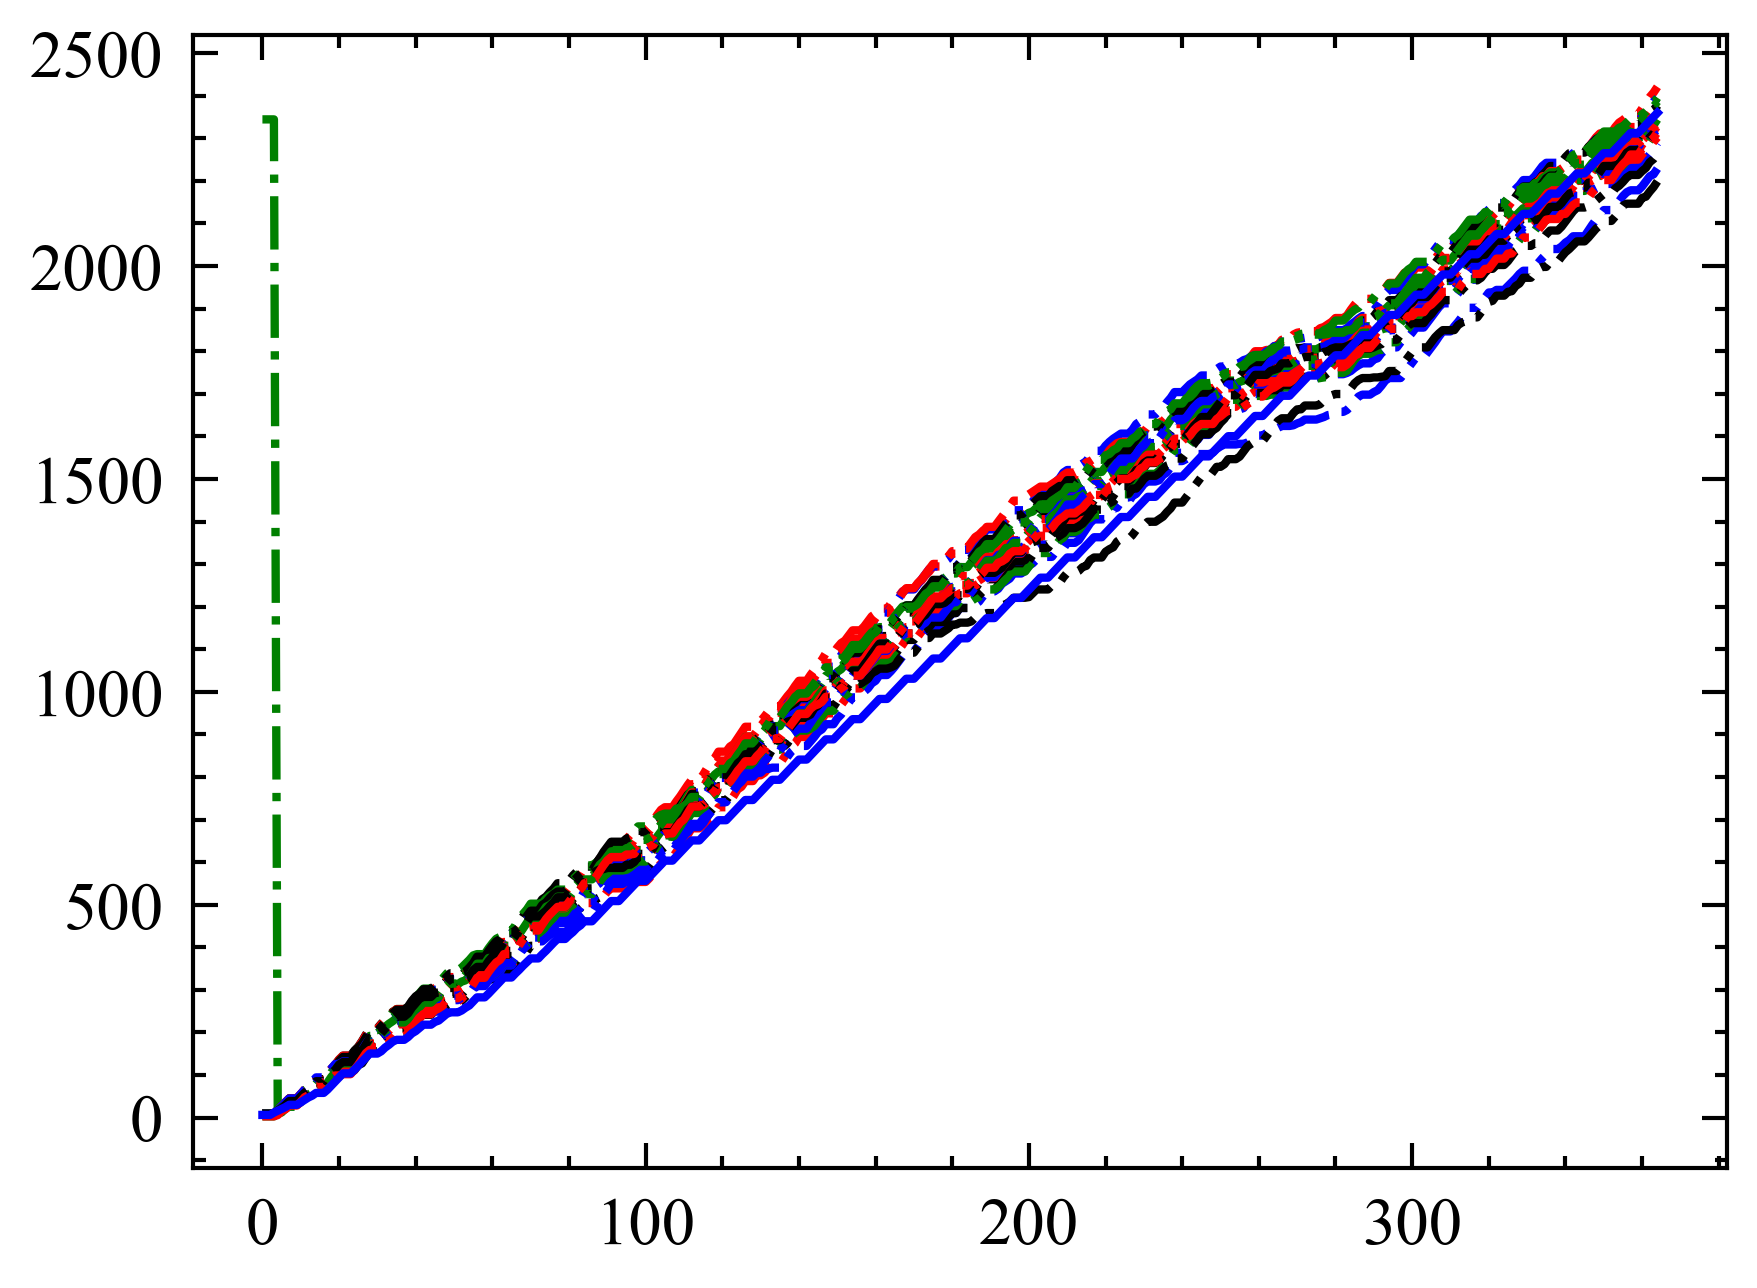

In [14]:
#for i in range(len(run_data)):
#    print(max(run_data[i]))
for i in range(len(run_data)):
    plt.plot(run_data[i], linestyle='dashdot')
plt.plot(a["FT_FMP"], linestyle='-')
plt.savefig('FHR.jpg', dpi=300)

<function matplotlib.pyplot.show(*args, **kw)>

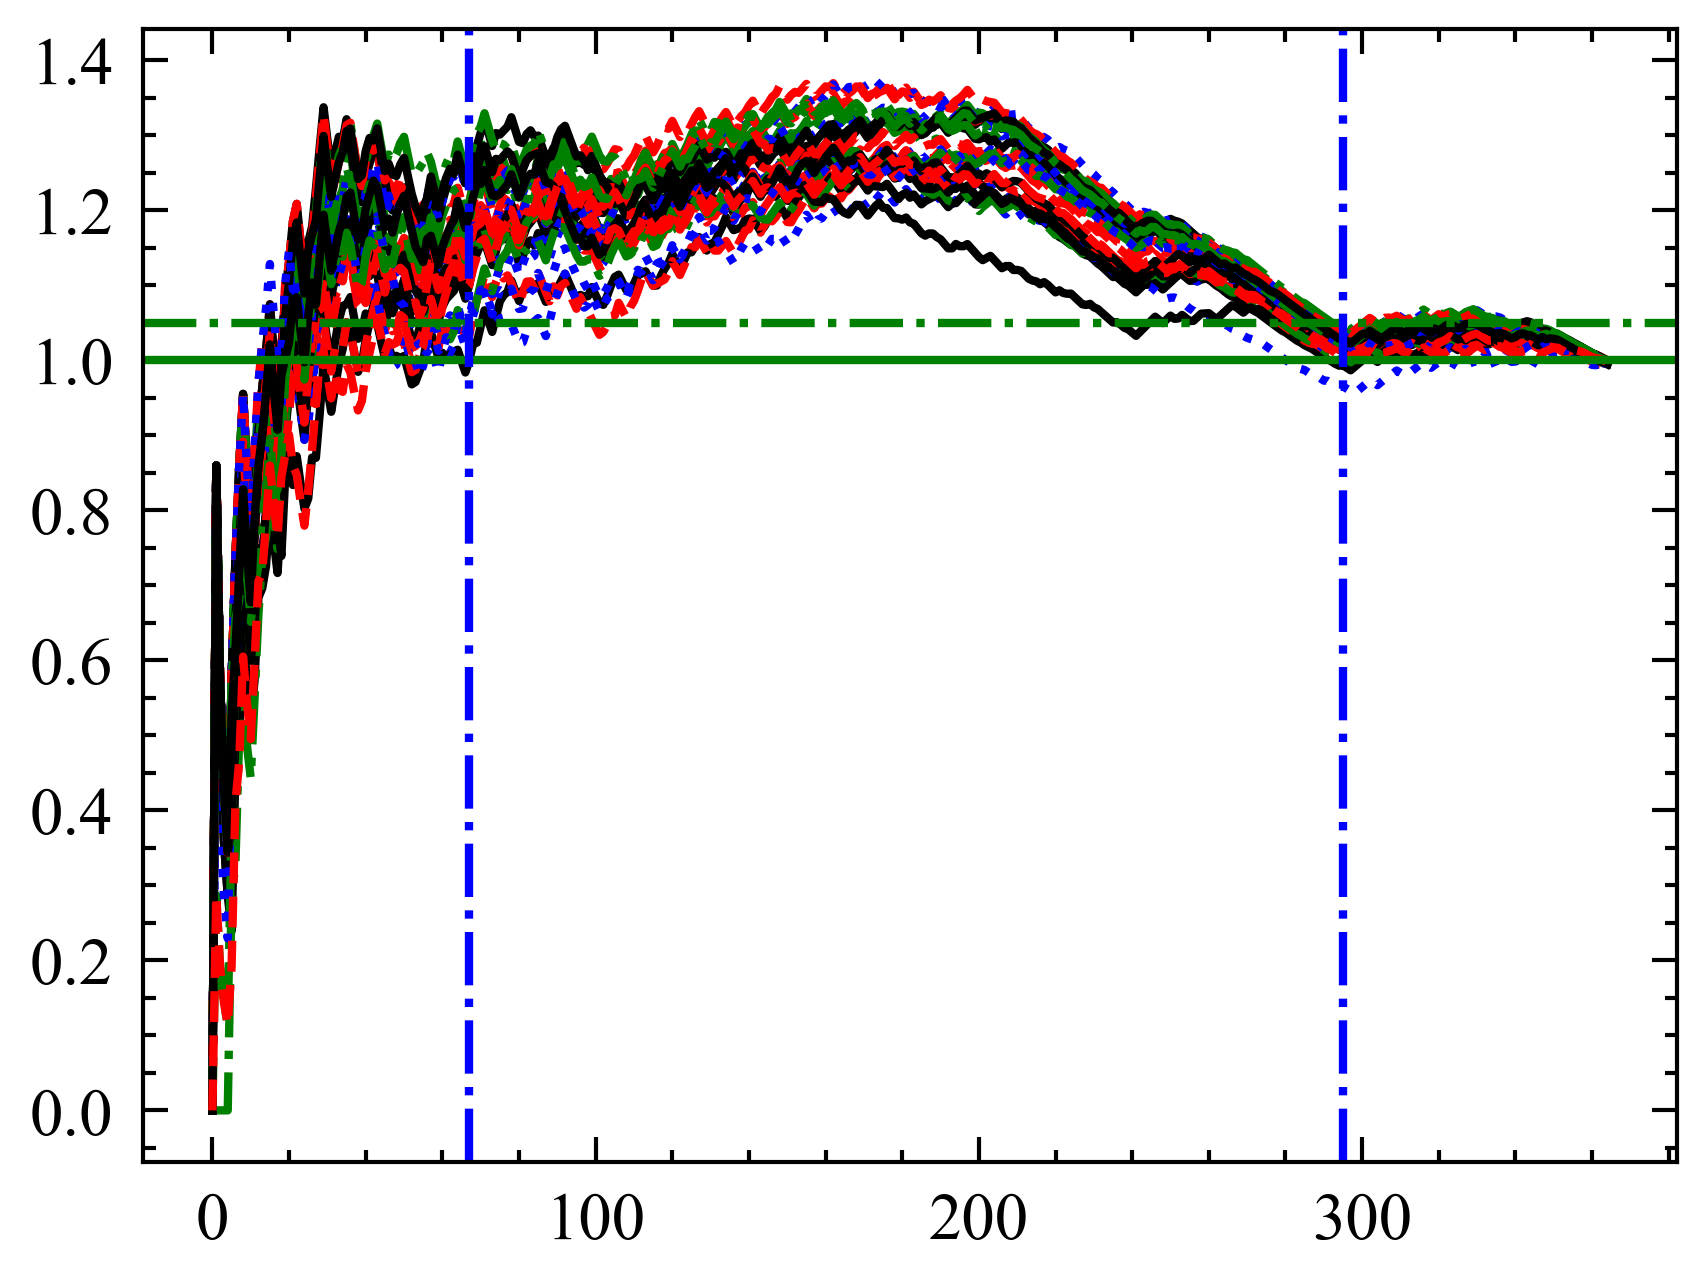

In [15]:
for i in range(len(relative)):
    plt.plot(relative[i])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=1.05, color='g', linestyle='dashdot')
plt.axvline(x=67, color='b', linestyle='dashdot')
#plt.axvline(x=120, color='r', linestyle='-')
#plt.axvline(x=240, color='r', linestyle='-')
#plt.axvline(x=304, color='r', linestyle='-')
#plt.axvline(x=337, color='r', linestyle='-')
#plt.axvline(x=344, color='r', linestyle='-')
#plt.axvline(x=351, color='r', linestyle='-')
#plt.axvline(x=358, color='r', linestyle='-')
plt.axvline(x=295, color='b', linestyle='dashdot')
plt.show

In [16]:
bound = []

line_max = []
line_min = []
line_avg = []
#for i in range(30):
   # for j in range(len(run_data)):
        #print(run_data[j][i])

In [17]:
bound = []

line = []
for j in range(len(run_data)):
    line.append(max(run_data[j]))
print(line)
bound.append(line)
#plt.plot(bound[0])


[2358.0, 2332.5, 2320.5, 2337.0, 2352.0, 2421.0, 2394.0, 2365.5, 2361.0, 2329.5, 2289.0, 2344.5, 2377.5, 2383.5, 2229.0, 2316.0, 2263.5, 2302.5, 2349.0, 2395.5, 2377.5, 2337.0, 2319.0, 2386.5, 2199.0, 2338.5, 2323.5, 2371.5, 2325.0, 2314.5]


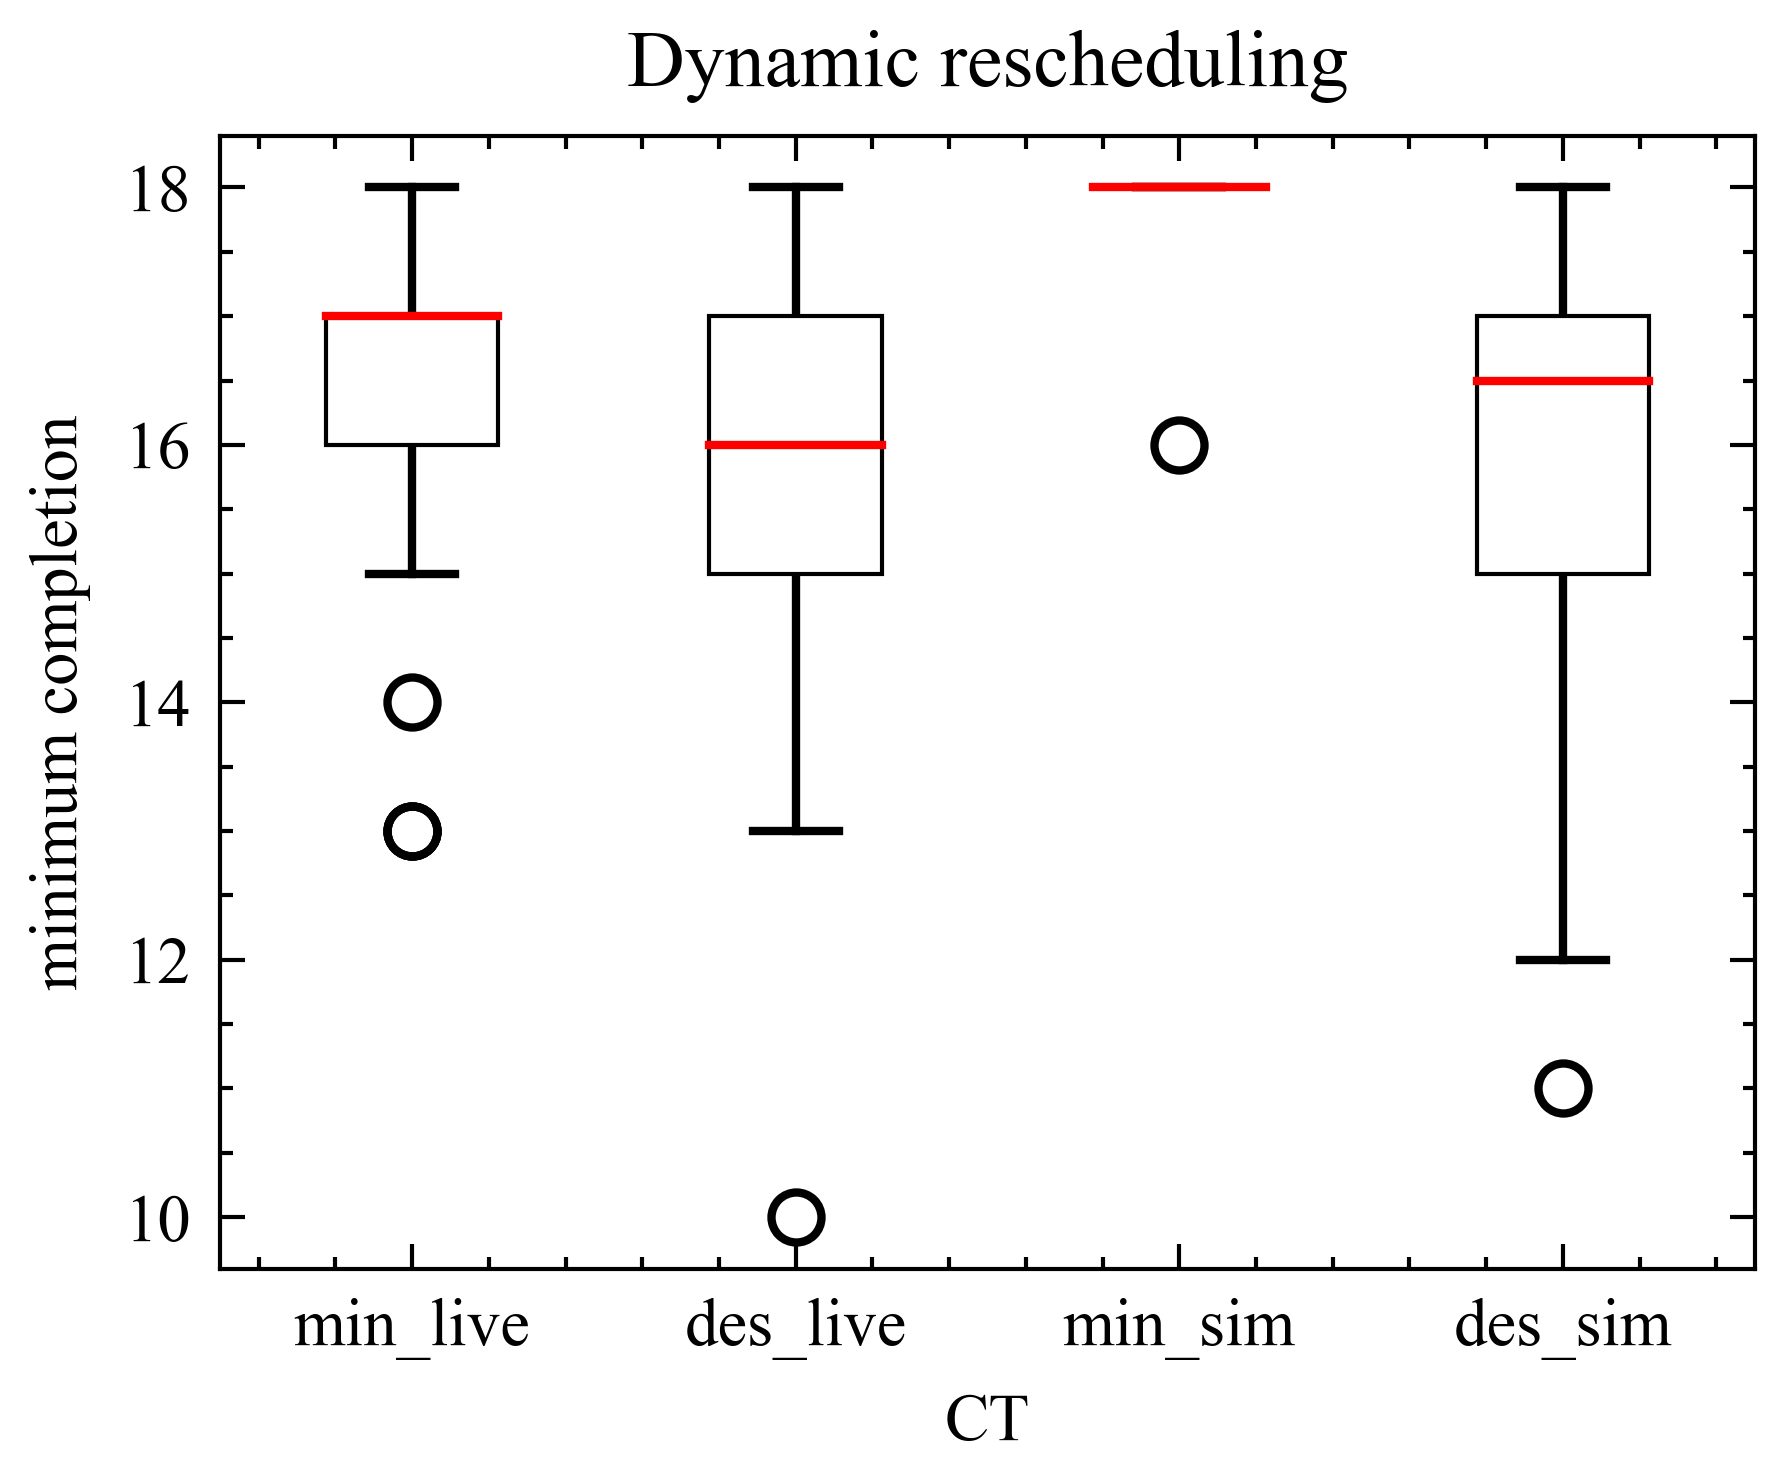

In [18]:
fig, ax = plt.subplots()
boxes = [data[0:30,0], data[0:30,1], data[0:30,3], data[0:30,4]]
bp = ax.boxplot(boxes, patch_artist=True)
ax.set(xlabel='CT'.format('Arial'))
ax.set(ylabel='minimum completion'.format('Arial'))
ax.set_title('Dynamic rescheduling'.format('Arial'))
ax.set_xticklabels(['min_live', 'des_live', 'min_sim', 'des_sim', f'{len(data)}'])
for box in bp['boxes']:
    box.set( color='k', linewidth=0.5)
    box.set( facecolor = 'w' )

for flier in bp['fliers']:
    flier.set(marker='o', color='r')#, alpha=0.5
fig.savefig('box.jpg', dpi=300)

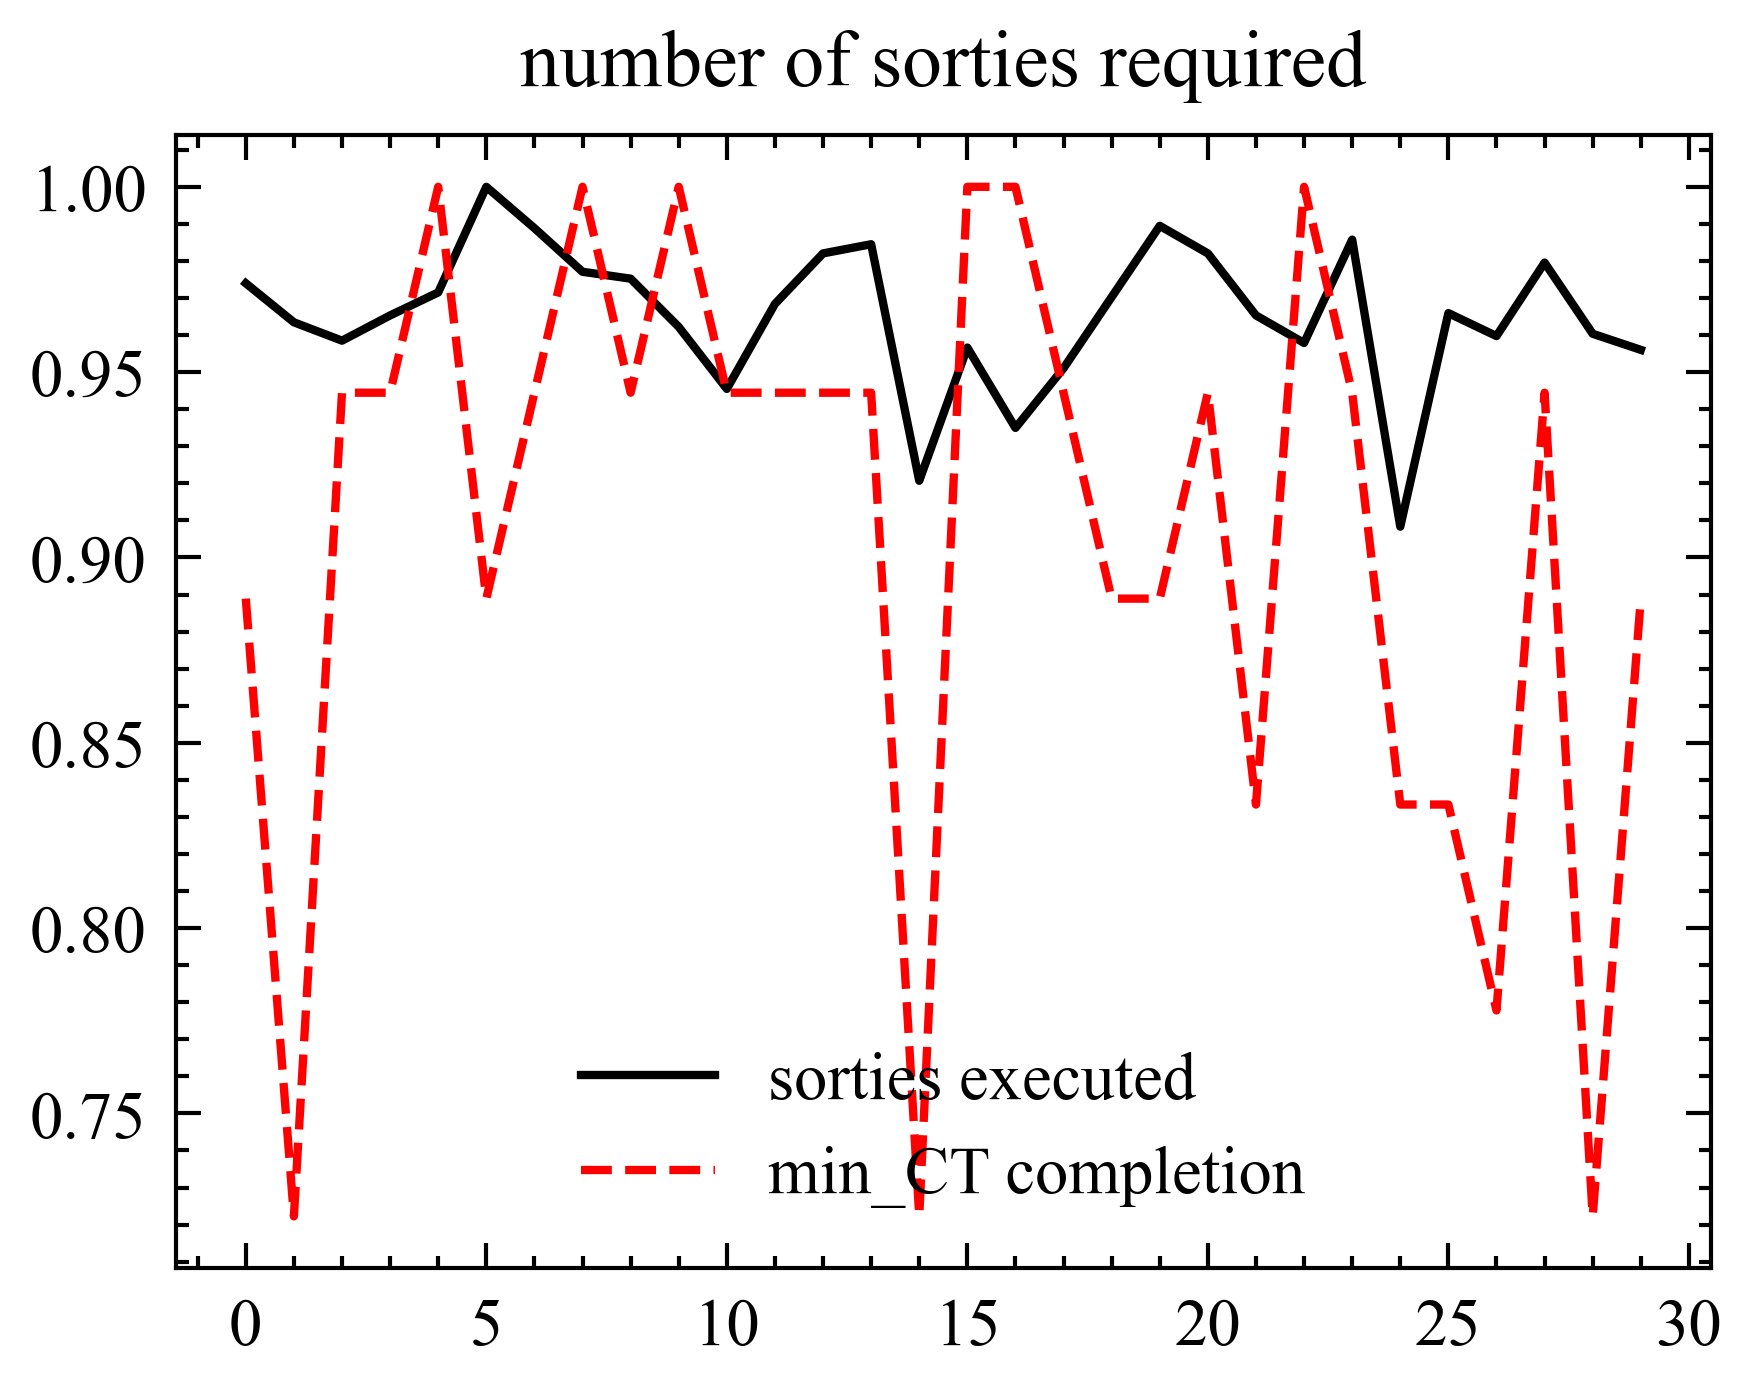

In [19]:
plt.plot(data[:,2]/max(data[:,2]), label='sorties executed')
plt.plot(data[:,0]/max(data[:,0]), c='r', label='min_CT completion')
plt.title('number of sorties required')
plt.legend()
plt.savefig('sorties_normalized.jpg', dpi=300)

In [20]:
covariance = np.cov(data[:,2]/max(data[:,2]), (data[:,0]/10))
r_pearson = pearsonr(data[:,2], data[:,0])
print(r_pearson[0]) #pearson r
print(r_pearson[1]) #significance for pearson r

0.2771173130585981
0.13819367827468884


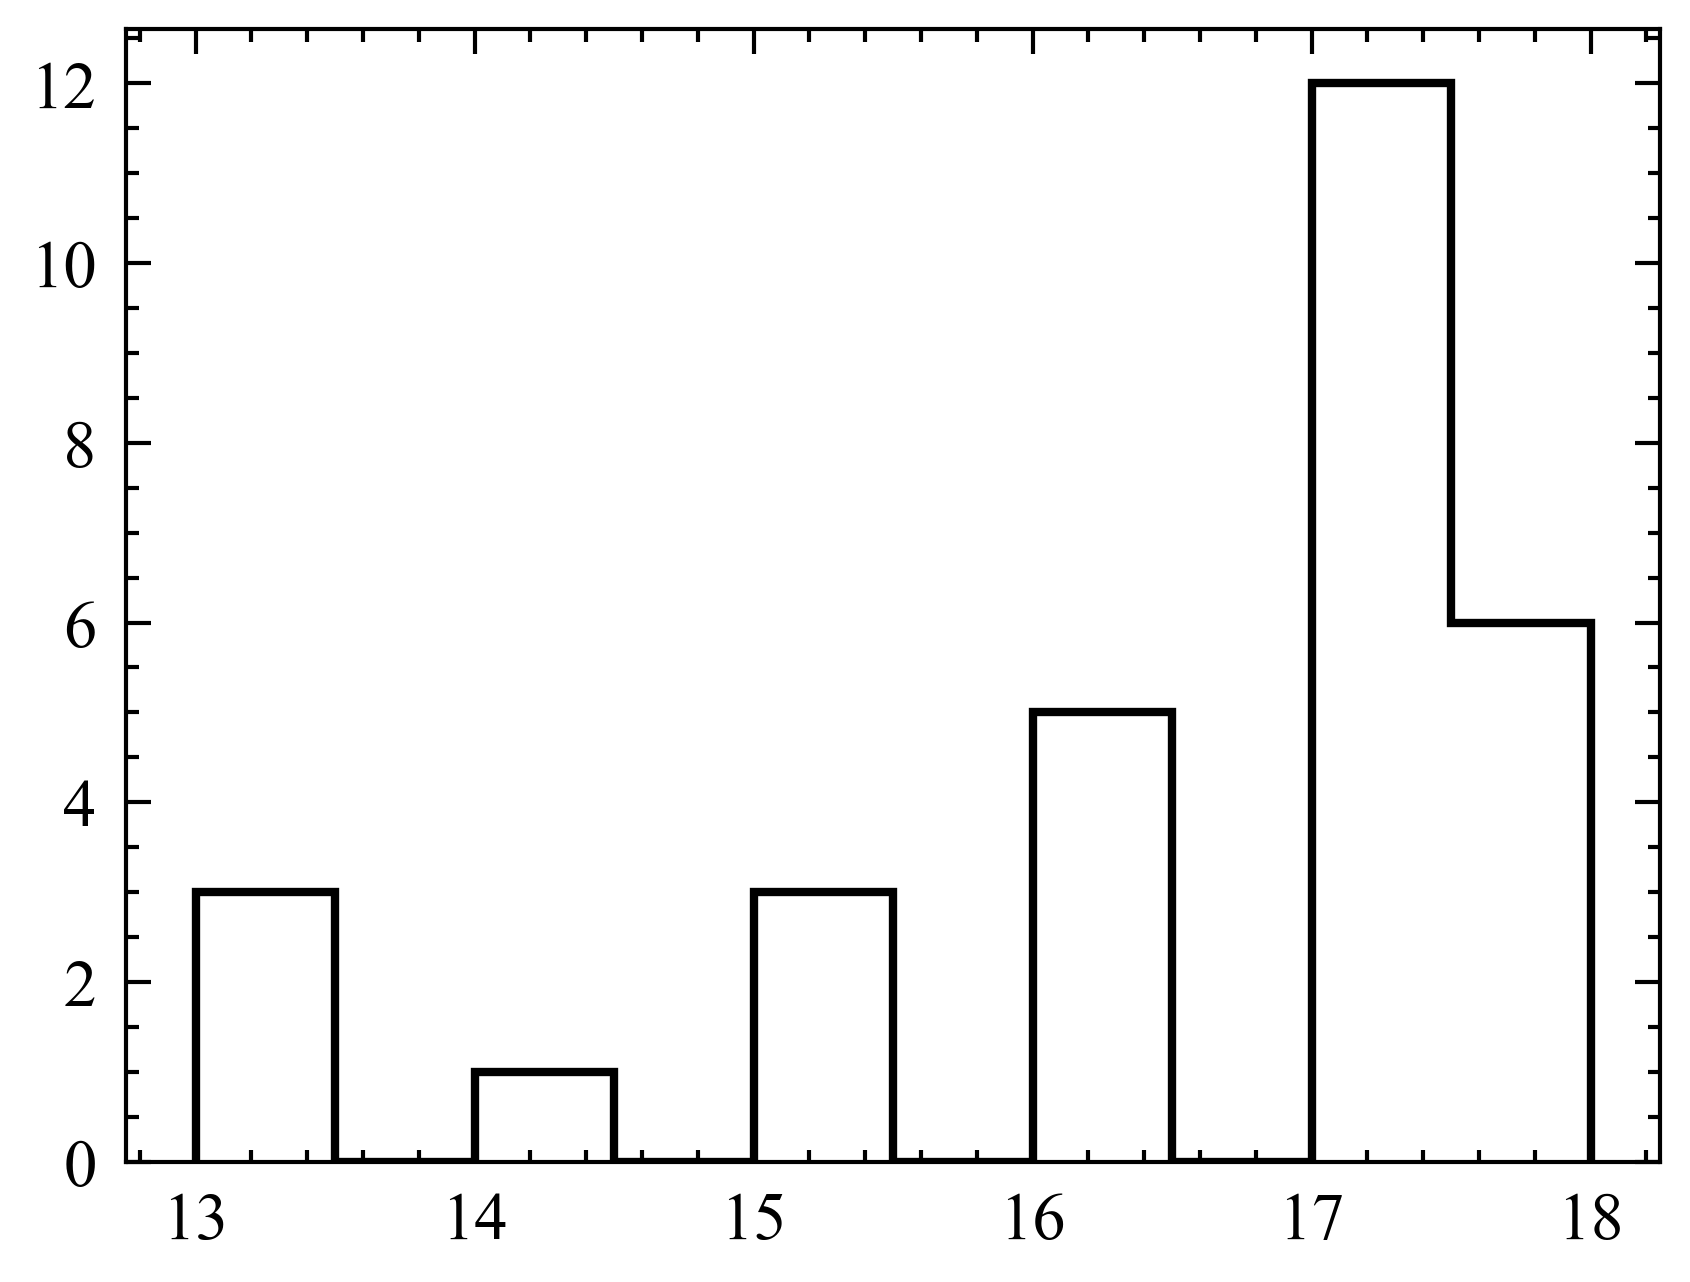

In [21]:
plt.hist(data[:,0], histtype='step')
plt.show()

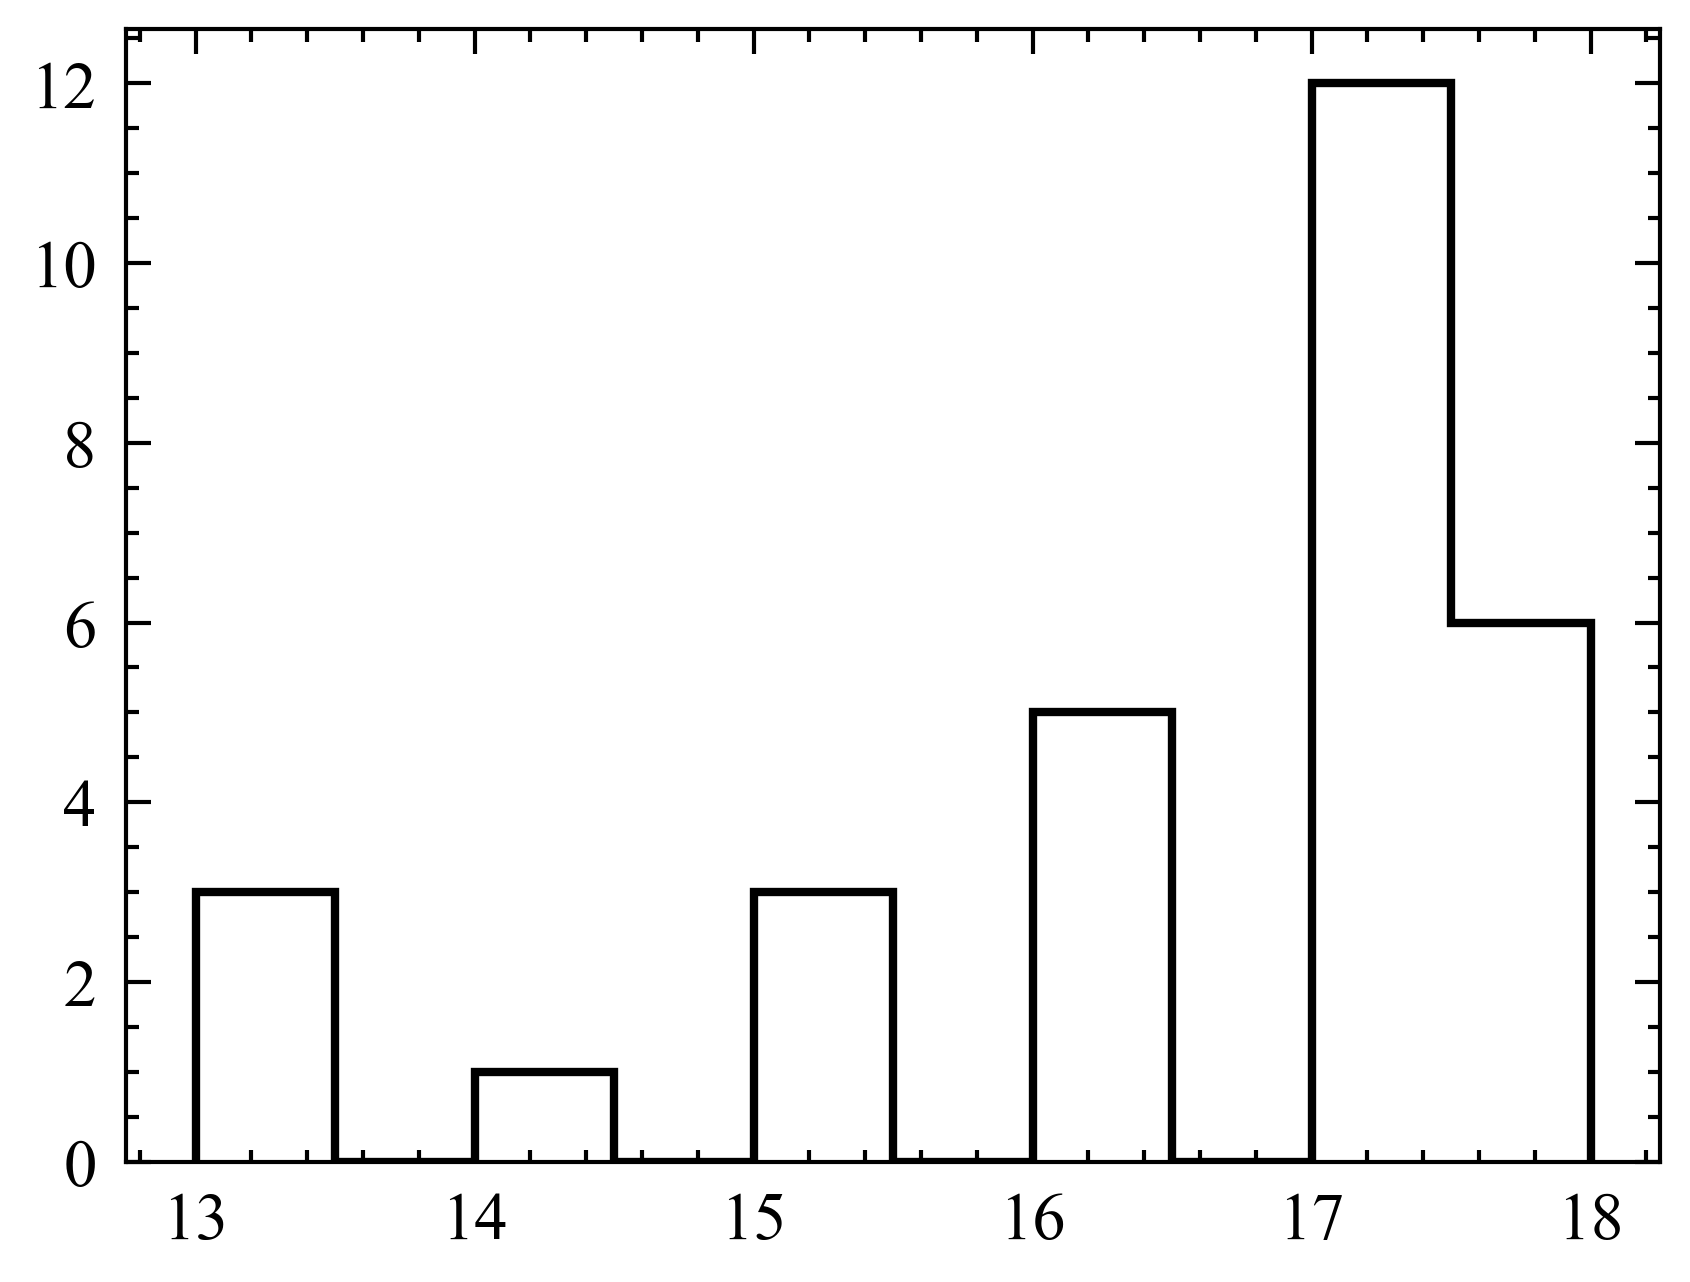

In [22]:
plt.hist(data[0:70,0], histtype='step')
plt.show()